In [11]:
import regionmask
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

# Read files

In [4]:
box=xr.open_dataset("polygon_box.nc")
triangle=xr.open_dataset("polygon_triangle.nc")
multipolys=xr.open_dataset("polygon_multipolys.nc")

shp_box=gpd.read_file('polygon_box.geojson')
shp_triangle=gpd.read_file('polygon_triangle.geojson')
shp_multipolys=gpd.read_file('polygon_multipolys.geojson')

<AxesSubplot:xlabel='lon', ylabel='lat'>

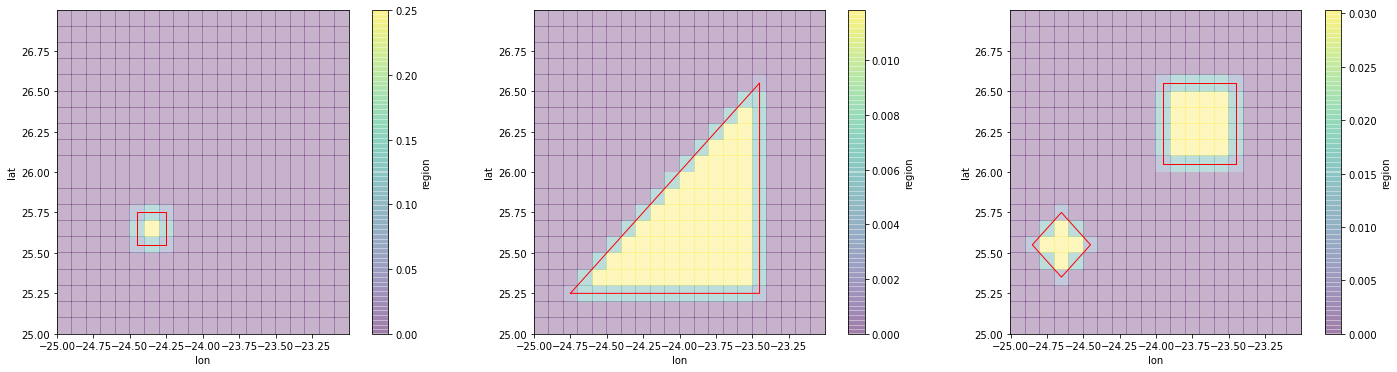

In [3]:
plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
box.region.plot(alpha=0.3)
shp_box.plot(ax=ax,edgecolor="r",facecolor="none") 

ax1 = plt.subplot(3,3,2)
triangle.region.plot(alpha=0.3)
shp_triangle.plot(ax=ax1,edgecolor="r",facecolor="none") 

ax2 = plt.subplot(3,3,3)
multipolys.region.plot(alpha=0.3)
shp_multipolys.plot(ax=ax2,edgecolor="r",facecolor="none") 

# Mask Shapes with Regionmask

In [4]:
my_box=regionmask.mask_geopandas(shp_box, box.lon, box.lat, method="weights_default")
my_triangle=regionmask.mask_geopandas(shp_triangle, triangle.lon, triangle.lat, method="weights_default")

polygon=[shp_multipolys[shp_multipolys["Name"]=="poly1"],shp_multipolys[shp_multipolys["Name"]=="poly2"]]
my_multipolys=regionmask.mask_geopandas(polygon, multipolys.lon, multipolys.lat, method="weights_default")

<AxesSubplot:xlabel='lon', ylabel='lat'>

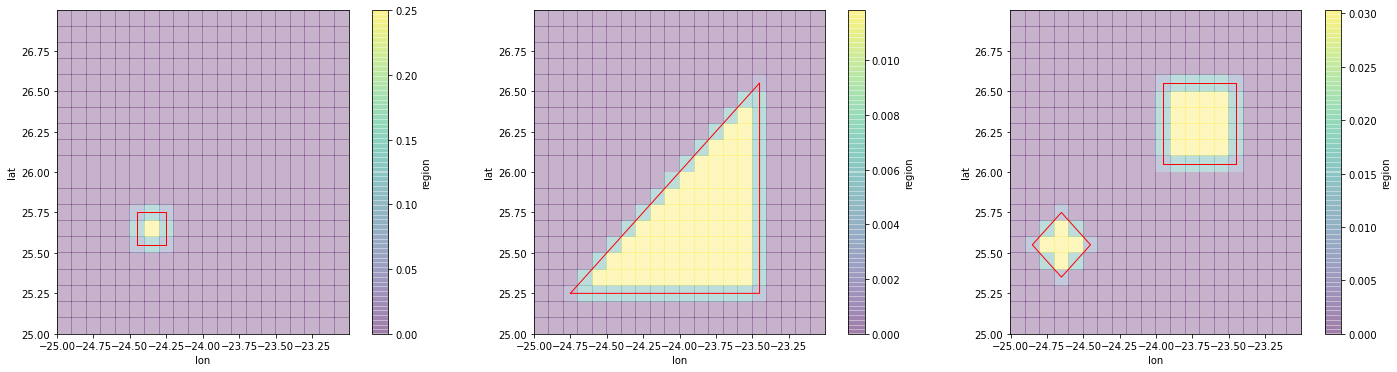

In [5]:
plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
my_box.plot(alpha=0.3)
shp_box.plot(ax=ax,edgecolor="r",facecolor="none") 

ax1 = plt.subplot(3,3,2)
my_triangle.plot(alpha=0.3)
shp_triangle.plot(ax=ax1,edgecolor="r",facecolor="none") 

ax2 = plt.subplot(3,3,3)
my_multipolys.plot(alpha=0.3)
shp_multipolys.plot(ax=ax2,edgecolor="r",facecolor="none") 

# Mask Shapes with Rot_Pole

In [34]:
shapefile_tot = 'Tempisque_cuenca_new.geojson'
poly = gpd.read_file(shapefile_tot)
infile='Tempisque_cuenca_SBK_weights_CORDEX_CORE_CAM022_REMO.nc'
ds1 = xr.open_dataset(infile)

In [35]:
crs="+proj=ob_tran +o_proj=longlat +o_lon_p=0.0 +o_lat_p=75.74 +lon_0=293.98 +to_meter=0.017453292519943295 +ellps=WGS84"
shapefile_region=poly.to_crs(crs)

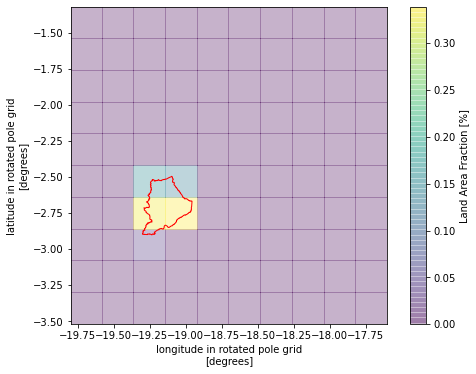

In [36]:
plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
ds1['weights'][115:125,150:160].plot(alpha=0.3)
shapefile_region.plot(ax=ax,edgecolor="r",facecolor="none") 
plt.show()

Enter rotated pole projection in the form: +proj=ob_tran +o_proj=longlat +o_lon_p=... +o_lat_p=... +lon_0=... +to_meter=... +ellps=...: +proj=ob_tran +o_proj=longlat +o_lon_p=0.0 +o_lat_p=75.74 +lon_0=293.98 +to_meter=0.017453292519943295 +ellps=WGS84


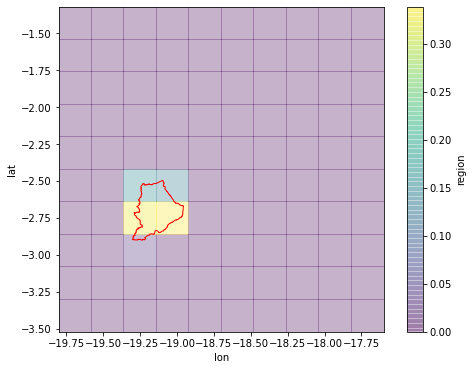

In [38]:
mask_tempisque= regionmask.mask_geopandas(poly, ds1.weights[115:125,150:160].rlon, ds1.weights[115:125,150:160].rlat, method="weights_rot_pole")

plt.figure(figsize=(20,15),tight_layout=True)

ax = plt.subplot(3,3,1)
mask_tempisque.plot(alpha=0.3)
shapefile_region.plot(ax=ax,edgecolor="r",facecolor="none") 
plt.show()